In [24]:
import pandas as pd
regdf = pd.read_csv("/Users/rakshapai/Box Sync/APM/Project/Data/RegSeasonMod.csv")
regdf.head()

,Season,id,matchid,Daynum,team,Result,score,oppscore,loc,Numot,...,ftm,fta,or,dr,ast,to,stl,blk,pf,oppdr
0,2003,1,2003-1,10,1104,1,68,62,N,0,...,11,18,14,24,13,23,7,1,22,22
1,2003,2,2003-2,10,1272,1,70,63,N,0,...,10,19,15,28,16,13,4,4,18,25
2,2003,3,2003-3,11,1266,1,73,61,N,0,...,17,29,17,26,15,10,5,2,25,22
3,2003,4,2003-4,11,1296,1,56,50,N,0,...,17,31,6,19,11,12,14,2,18,20
4,2003,5,2003-5,11,1400,1,77,71,N,0,...,11,13,17,22,12,14,4,4,20,15


In [25]:
poss = pd.DataFrame(pd.pivot_table(regdf,values=('fga','or','to','fta'),index=('matchid'),aggfunc = sum)).reset_index()
poss.head

<bound method DataFrame.head of           matchid  fga  fta  or  to
0          2003-1  111   40  24  41
1         2003-10  119   31  23  24
2        2003-100  105   24  16  26
3       2003-1000  100   60  14  37
4       2003-1001  102   36  13  34
5       2003-1002  114   55  25  33
6       2003-1003  110   65  24  36
7       2003-1004  121   51  17  45
8       2003-1005   89   28  14  20
9       2003-1006  121   43  27  35
10      2003-1007  100   40  23  39
11      2003-1008  113   46  23  35
12      2003-1009  120   42  29  43
13       2003-101  111   51  32  55
14      2003-1010  107   48  18  38
15      2003-1011  123   43  28  33
16      2003-1012   96   44  26  36
17      2003-1013   88   47  25  40
18      2003-1014  104   55  25  30
19      2003-1015  129   38  22  39
20      2003-1016  126   37  22  21
21      2003-1017  117   20  15  30
22      2003-1018  108   35  15  37
23      2003-1019  113   48  21  31
24       2003-102  126   51  30  39
25      2003-1020  128   45  29 

In [28]:
# possesions
poss['poss'] = 0.96*(poss['fga']-poss['or']-poss['to']+(0.475*poss['fta']))
poss[:5]

,matchid,fga,fta,or,to,poss
0,2003-1,111,40,24,41,62.400
1,2003-10,119,31,23,24,83.256
2,2003-100,105,24,16,26,71.424
3,2003-1000,100,60,14,37,74.400
4,2003-1001,102,36,13,34,69.216


In [29]:
possessions = poss[['matchid','poss']].set_index('matchid')
possessions[:5]

,poss
matchid,
2003-1,62.400
2003-10,83.256
2003-100,71.424
2003-1000,74.400
2003-1001,69.216


In [31]:
regdf = regdf.join(possessions, on ='matchid',how='left',rsuffix = '_p')
regdf[:5]

,Season,id,matchid,Daynum,team,Result,score,oppscore,loc,Numot,...,fta,or,dr,ast,to,stl,blk,pf,oppdr,poss
0,2003,1,2003-1,10,1104,1,68,62,N,0,...,18,14,24,13,23,7,1,22,22,62.400
1,2003,2,2003-2,10,1272,1,70,63,N,0,...,19,15,28,16,13,4,4,18,25,84.024
2,2003,3,2003-3,11,1266,1,73,61,N,0,...,29,17,26,15,10,5,2,25,22,82.272
3,2003,4,2003-4,11,1296,1,56,50,N,0,...,31,6,19,11,12,14,2,18,20,52.656
4,2003,5,2003-5,11,1400,1,77,71,N,0,...,13,17,22,12,14,4,4,20,15,76.800


In [36]:
regdf.columns

Index([u'Season', u'id', u'matchid', u'Daynum', u'team', u'Result', u'score',
       u'oppscore', u'loc', u'Numot', u'fgm', u'fga', u'fgm3', u'fga3', u'ftm',
       u'fta', u'or', u'dr', u'ast', u'to', u'stl', u'blk', u'pf', u'oppdr',
       u'poss'],
      dtype='object')

In [37]:
#offensive efficiency
regdf['oe'] = regdf['score']*100/regdf['poss']

#defensive efficiency
regdf['de'] = regdf['oppscore']*100/regdf['poss']

#effective field goal pct
regdf['efgp'] = (regdf['fgm']+ (0.5*regdf['fgm3'])) / regdf['fga']

#turnover pct
regdf['topct'] = regdf['to'] / regdf['poss']

#offensive rebound pct
regdf['orpct'] = regdf['or']/(regdf['or'] + regdf['oppdr'])

#free throw rate
regdf['ftr'] = regdf['fta']/regdf['fga']

In [38]:
regdf[:5]

,Season,id,matchid,Daynum,team,Result,score,oppscore,loc,Numot,...,blk,pf,oppdr,poss,oe,de,efgp,topct,orpct,ftr
0,2003,1,2003-1,10,1104,1,68,62,N,0,...,1,22,22,62.400,108.974359,99.358974,0.491379,0.368590,0.388889,0.310345
1,2003,2,2003-2,10,1272,1,70,63,N,0,...,4,18,25,84.024,83.309531,74.978578,0.483871,0.154718,0.375000,0.306452
2,2003,3,2003-3,11,1266,1,73,61,N,0,...,2,25,22,82.272,88.730066,74.144302,0.482759,0.121548,0.435897,0.500000
3,2003,4,2003-4,11,1296,1,56,50,N,0,...,2,18,20,52.656,106.350653,94.955940,0.513158,0.227894,0.230769,0.815789
4,2003,5,2003-5,11,1400,1,77,71,N,0,...,4,20,15,76.800,100.260417,92.447917,0.540984,0.182292,0.531250,0.213115


In [39]:
teamseason = pd.DataFrame(pd.pivot_table(regdf,values=('oe','de','efgp','topct','orpct','ftr'),index=('Season','team'),
                            aggfunc = 'mean')).reset_index()
teamseason[:5]

,Season,team,de,efgp,ftr,oe,orpct,topct
0,2003,1102,98.007590,0.584407,0.446693,99.047952,0.168235,0.205461
1,2003,1103,95.431363,0.536564,0.465135,95.703642,0.305803,0.158523
2,2003,1104,86.493311,0.475785,0.372350,91.719199,0.371256,0.181352
3,2003,1105,102.976535,0.457983,0.359501,95.829631,0.335166,0.259103
4,2003,1106,93.377151,0.481697,0.307563,93.871689,0.349480,0.260063


In [40]:
tourneymatches = pd.read_csv("/Users/rakshapai/Box Sync/APM/Project/Data/TourneyMatches.csv")
tourneymatches.head()

,Season,team,opp,result
0,2003,1421,1411,1
1,2003,1112,1436,1
2,2003,1113,1272,1
3,2003,1141,1166,1
4,2003,1143,1301,1


In [42]:
tourneymatches1 = pd.merge(tourneymatches, teamseason,  how='left', left_on=['Season','team'], 
                           right_on = ['Season','team'])
tourneymatches1[:5]

,Season,team,opp,result,de,efgp,ftr,oe,orpct,topct
0,2003,1421,1411,1,99.360209,0.489800,0.377214,90.152124,0.347184,0.212106
1,2003,1112,1436,1,81.193167,0.517632,0.387965,99.086295,0.394027,0.176147
2,2003,1113,1272,1,89.810525,0.517334,0.468561,99.868873,0.398080,0.187727
3,2003,1141,1166,1,101.793851,0.572835,0.481836,110.039719,0.359177,0.258307
4,2003,1143,1301,1,87.973364,0.524098,0.348311,94.019518,0.322310,0.184171


In [43]:
tourneymatches_final = pd.merge(tourneymatches1, teamseason,  how='left', left_on=['Season','opp'], 
                           right_on = ['Season','team'], suffixes = ('','_opp'))

In [44]:
tourneymatches_final[:10]

,Season,team,opp,result,de,efgp,ftr,oe,orpct,topct,team_opp,de_opp,efgp_opp,ftr_opp,oe_opp,orpct_opp,topct_opp
0,2003,1421,1411,1,99.360209,0.489800,0.377214,90.152124,0.347184,0.212106,1411,89.908629,0.503036,0.529491,92.363798,0.360133,0.201451
1,2003,1112,1436,1,81.193167,0.517632,0.387965,99.086295,0.394027,0.176147,1436,84.627323,0.494732,0.356274,90.826823,0.380016,0.192042
2,2003,1113,1272,1,89.810525,0.517334,0.468561,99.868873,0.398080,0.187727,1272,83.491920,0.498337,0.396624,95.537038,0.366803,0.183159
3,2003,1141,1166,1,101.793851,0.572835,0.481836,110.039719,0.359177,0.258307,1166,86.480669,0.567455,0.354147,106.903628,0.339233,0.184353
4,2003,1143,1301,1,87.973364,0.524098,0.348311,94.019518,0.322310,0.184171,1301,92.571872,0.534189,0.387496,99.728410,0.308813,0.198346
5,2003,1163,1140,1,84.884639,0.524237,0.363274,94.494827,0.403977,0.192558,1140,88.135253,0.532677,0.481483,101.126489,0.343470,0.197637
6,2003,1181,1161,1,88.638244,0.521745,0.472124,103.951321,0.375103,0.181658,1161,95.769615,0.548663,0.476115,96.914345,0.361122,0.218534
7,2003,1211,1153,1,88.306073,0.536146,0.460778,101.218491,0.358111,0.194174,1153,78.842606,0.465465,0.382117,86.895441,0.332504,0.139801
8,2003,1228,1443,1,80.356907,0.551888,0.346773,99.959448,0.307924,0.178685,1443,90.710975,0.533057,0.395981,100.922335,0.357503,0.212287
9,2003,1242,1429,1,83.035010,0.525461,0.389676,102.151360,0.382850,0.189938,1429,86.563732,0.495004,0.392423,94.557255,0.391238,0.179327


In [45]:
tourneymatches_final.columns

Index([u'Season', u'team', u'opp', u'result', u'de', u'efgp', u'ftr', u'oe',
       u'orpct', u'topct', u'team_opp', u'de_opp', u'efgp_opp', u'ftr_opp',
       u'oe_opp', u'orpct_opp', u'topct_opp'],
      dtype='object')

In [136]:
train = tourneymatches_final[tourneymatches_final['Season']<2016]
test = tourneymatches_final[tourneymatches_final['Season']==2016]

In [47]:
len(train)

1694

In [48]:
len(test)

134

In [49]:
formula = 'result ~ 0 + de + efgp + ftr + oe + orpct + topct + de_opp + efgp_opp + ftr_opp + oe_opp + orpct_opp + topct_opp'

In [50]:
from patsy import dmatrices

Y_train, X_train = dmatrices(formula, train, return_type='dataframe')
y_train = Y_train['result'].values


Y_test, X_test = dmatrices(formula, test, return_type='dataframe')
y_test = Y_test['result'].values

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [52]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print (metrics.accuracy_score(y_train, prediction_train))

0.669421487603


In [53]:
prediction = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.701492537313


In [71]:
# returns all probability estimates
probs = model.predict_proba(X_test)
probs[:5]

array([[ 0.27020428,  0.72979572],
       [ 0.28437303,  0.71562697],
       [ 0.74123192,  0.25876808],
       [ 0.41912404,  0.58087596],
       [ 0.59793722,  0.40206278]])

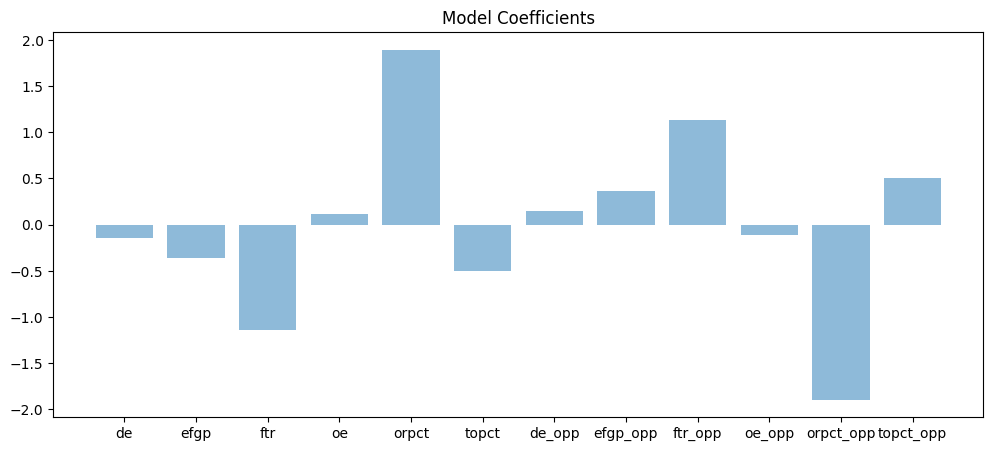

In [102]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
predictors = ('de', 'efgp', 'ftr', 'oe', 'orpct', 'topct', 'de_opp', 'efgp_opp', 'ftr_opp', 'oe_opp', 'orpct_opp', 'topct_opp')
y_pos = np.arange(len(predictors))
model_coeff = model.coef_.tolist()[0]
 
plt.bar(y_pos, model_coeff, align='center', alpha=0.5, )
plt.xticks(y_pos, predictors)
plt.title('Model Coefficients')
 
plt.show()

In [63]:
# probability estimates from cross validation model
win_prob = pd.Series(clf.predict_proba(X_test)[:,1])
test[:5]

,Season,team,opp,result,de,efgp,ftr,oe,orpct,topct,team_opp,de_opp,efgp_opp,ftr_opp,oe_opp,orpct_opp,topct_opp
847,2016,1195,1192,1,79.861960,0.513831,0.373592,82.931750,0.309401,0.134814,1192,93.081769,0.518572,0.342831,91.104348,0.289454,0.160141
848,2016,1455,1435,1,75.541170,0.500143,0.394540,93.111908,0.312889,0.127729,1435,73.677602,0.535124,0.406346,83.446793,0.275286,0.130477
849,2016,1221,1380,1,87.655012,0.480494,0.366279,82.380712,0.236668,0.142314,1380,81.714935,0.487049,0.393882,83.672709,0.280808,0.136475
850,2016,1276,1409,1,80.083591,0.551676,0.290335,87.363326,0.244997,0.115758,1409,82.745305,0.505934,0.408039,88.443758,0.276815,0.134116
851,2016,1114,1345,1,77.945353,0.526899,0.316043,91.308479,0.267387,0.137504,1345,72.085416,0.539472,0.356026,86.480739,0.346330,0.136206


In [65]:
test_new['win_prob'] = win_prob

In [66]:
test_new = test_new[['team','opp','win_prob','result']]
test_new[:5]

,team,opp,win_prob,result
0,1195,1192,0.720273,1
1,1455,1435,0.764622,1
2,1221,1380,0.240624,1
3,1276,1409,0.603964,1
4,1114,1345,0.341908,1


In [ ]:
test_final = pd.merge(test_new,test_new,left_on = ['team','opp'], right_on = ['opp','team'],how = 'left', 
         suffixes = ('_team','_opp'))

In [70]:
test_final[test_final['team_team'] == 1195]

,team_team,opp_team,win_prob_team,result_team,team_opp,opp_opp,win_prob_opp,result_opp,pred_result,check
0,1195,1192,0.720273,1,1192,1195,0.279721,0,1.0,False
81,1195,1314,0.115857,0,1314,1195,0.884110,1,0.0,False


In [68]:
test_final['pred_result'] = 0.0
test_final['pred_result'][test_final['win_prob_team'] > test_final['win_prob_opp']] = 1.0

/Users/rakshapai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
test_final['check'] = test_final['result_team']!=test_final['pred_result']
test_final['check'].value_counts()/2

False    47.0
True     20.0
Name: check, dtype: float64

# MLP

In [247]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score

clf = MLPClassifier(hidden_layer_sizes=(1000,100), random_state=1)
clf.fit(X_train, Y_train)                         

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [248]:
win_prob = pd.Series(clf.predict_proba(X_test)[:,1])
test_new = test.reset_index()

In [249]:
test_new['win_prob'] = win_prob

In [250]:
test_new = test_new[['team','opp','win_prob','result']]
test_final = pd.merge(test_new,test_new,left_on = ['team','opp'], right_on = ['opp','team'],how = 'left', 
         suffixes = ('_team','_opp'))

In [251]:
test_final['pred_result'] = 0.0
test_final['pred_result'][test_final['win_prob_team'] > test_final['win_prob_opp']] = 1.0
(len(test_final[test_final['pred_result']-test_final['result_team'] == 0])* 1.0 / len(test_final) ) *100

/Users/rakshapai/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


70.1492537313433